In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

%matplotlib inline

/Users/minjunggim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


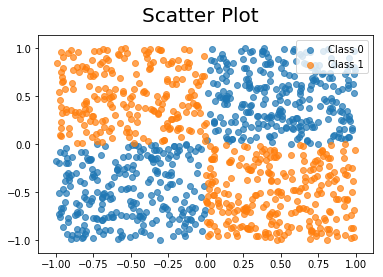

In [2]:
# Generate XOR data
np.random.seed(20180324)

x_data = np.random.uniform(-1,1, [1000,2])
y_data = np.array([0 if x_data[i][0]*x_data[i][1] >= 0. 
                   else 1 for i in range(len(x_data))])

plt.suptitle("Scatter Plot", fontsize=20)
plt.scatter(x_data[y_data == 0, 0], x_data[y_data == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(x_data[y_data == 1, 0], x_data[y_data == 1, 1], label="Class 1", alpha=0.7)
plt.legend()

x_train, x_test, y_train, y_test = \
train_test_split(x_data, y_data, test_size=0.3, random_state=777)

Step : 1000, Cost : 0.6255757  Accuracy : 0.7014286
Step : 2000, Cost : 0.47922978  Accuracy : 0.8314286
Step : 3000, Cost : 0.3302853  Accuracy : 0.9028571
Step : 4000, Cost : 0.23751432  Accuracy : 0.9457143
Step : 5000, Cost : 0.18482092  Accuracy : 0.9714286
Step : 6000, Cost : 0.15372595  Accuracy : 0.98142856
Step : 7000, Cost : 0.13372914  Accuracy : 0.98571426
Step : 8000, Cost : 0.119686745  Accuracy : 0.9885714
Step : 9000, Cost : 0.109127656  Accuracy : 0.98714286
Step : 10000, Cost : 0.10079169  Accuracy : 0.98571426


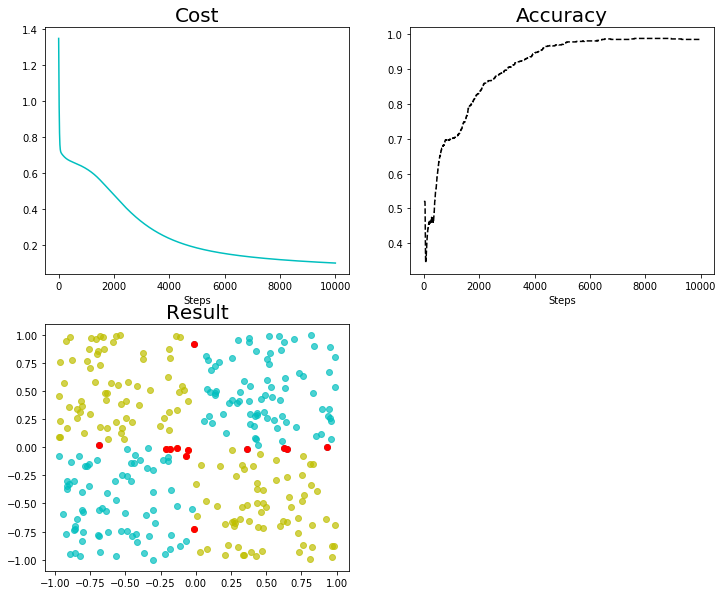

In [7]:
X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

W0 = tf.Variable(tf.random_normal([2,20]), dtype=tf.float32)
b0 = tf.Variable(tf.random_normal([20]), dtype=tf.float32)

H0 = tf.sigmoid(tf.matmul(X,W0)+b0)

W1 = tf.Variable(tf.random_normal([20,10]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([10]), dtype=tf.float32)

H1 = tf.sigmoid(tf.matmul(H0,W1)+b1)

W2 = tf.Variable(tf.random_normal([10,1]), dtype=tf.float32)
b2 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

H = tf.sigmoid(tf.matmul(H1,W2)+b2)

loss = - tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 10000
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train],
                             feed_dict={X: x_train, Y: np.reshape(y_train, [-1,1])})
    cost_list.append(cost)
    acc_list.append(acc)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(12,10))     
plt.subplot(221)
plt.xlabel("Steps")
plt.title("Cost", fontsize=20)
_ = plt.plot(cost_list, "c")

plt.subplot(222)
plt.xlabel("Steps")
plt.title("Accuracy", fontsize=20)
_ = plt.plot(acc_list, "k--")

Hypothesis = sess.run(H, feed_dict={X: x_test})

plt.subplot(223)
plt.title("Result", fontsize=20)
for i, j in enumerate(Hypothesis):
    if j > 0.5 : 
        _ = plt.plot(x_test[i][0], x_test[i][1], "yo", alpha=0.7)
    else :
        _ = plt.plot(x_test[i][0], x_test[i][1], "co", alpha=0.7)
for i in range(len(Hypothesis)):
    if np.around(Hypothesis)[i] != y_test[i]:
        _ = plt.plot(x_test[i][0], x_test[i][1], "ro")

# 같은 MLP 모델을 다른 데이터에 적용하기

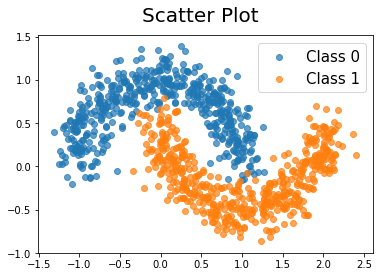

In [13]:
# Moon data
x_moon, y_moon = make_moons(n_samples=1000, shuffle=True, noise=0.15, random_state=10)

plt.suptitle("Scatter Plot", fontsize=20)
plt.scatter(x_moon[y_moon == 0, 0], x_moon[y_moon == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(x_moon[y_moon == 1, 0], x_moon[y_moon == 1, 1], label="Class 1", alpha=0.7)
plt.legend(fontsize=15)

x_train, x_test, y_train, y_test = \
train_test_split(x_moon, y_moon, test_size=0.3, random_state=777)

Step : 1000, Cost : 0.26574174  Accuracy : 0.8857143
Step : 2000, Cost : 0.2550007  Accuracy : 0.8914286
Step : 3000, Cost : 0.24534495  Accuracy : 0.89857143
Step : 4000, Cost : 0.2288888  Accuracy : 0.9028571
Step : 5000, Cost : 0.20260409  Accuracy : 0.92142856
Step : 6000, Cost : 0.16876042  Accuracy : 0.93142855
Step : 7000, Cost : 0.13524619  Accuracy : 0.94857144
Step : 8000, Cost : 0.108442545  Accuracy : 0.9614286
Step : 9000, Cost : 0.089362584  Accuracy : 0.9685714
Step : 10000, Cost : 0.07618142  Accuracy : 0.9742857


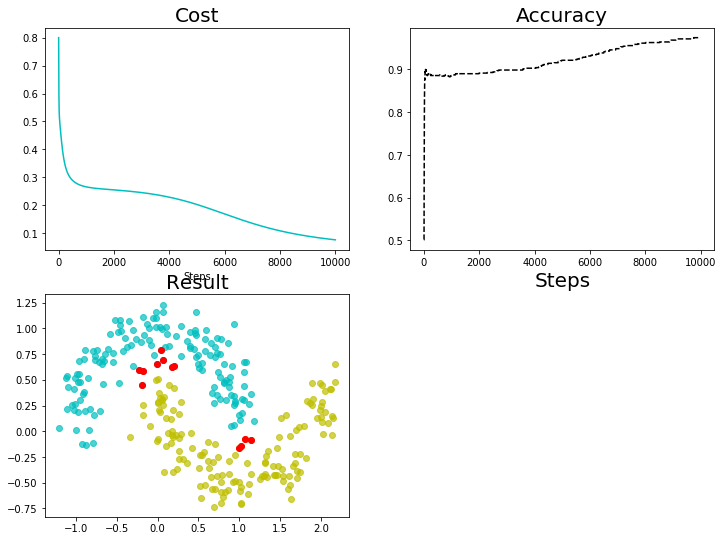

In [14]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 10000
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train],
                             feed_dict={X: x_train, Y: np.reshape(y_train, [-1,1])})
    cost_list.append(cost)
    acc_list.append(acc)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(12,9))     
plt.subplot(221)
plt.title("Cost", fontsize=20)
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c")

plt.subplot(222)
plt.title("Accuracy", fontsize=20)
plt.xlabel("Steps", fontsize=20)
_ = plt.plot(acc_list, "k--")

Hypothesis = sess.run(H, feed_dict={X: x_test})


plt.subplot(223)
plt.title("Result", fontsize=20)
for i, j in enumerate(Hypothesis):
    if j > 0.5 : 
        _ = plt.plot(x_test[i][0], x_test[i][1], "yo", alpha=0.7)
    else :
        _ = plt.plot(x_test[i][0], x_test[i][1], "co", alpha=0.7)
for i in range(len(Hypothesis)):
    if np.around(Hypothesis)[i] != y_test[i]:
        plt.plot(x_test[i][0], x_test[i][1], "ro")